In [177]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
rcParams['figure.figsize'] = 10, 8

### 2D

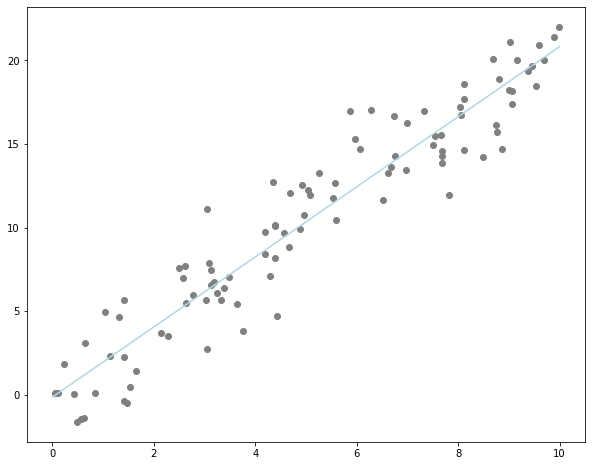

In [203]:
x = np.random.uniform(0, 10, size=100)
y = np.array((2.1 * x) + [random.gauss(0,2) for x in range(100)])
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y.reshape(-1, 1))
pred_x = np.linspace(0,10).reshape(-1, 1)
pred_y = lr.predict(pred_x)
plt.plot(pred_x, pred_y, color='lightblue')
plt.scatter(x, y, color='gray')

### 3D

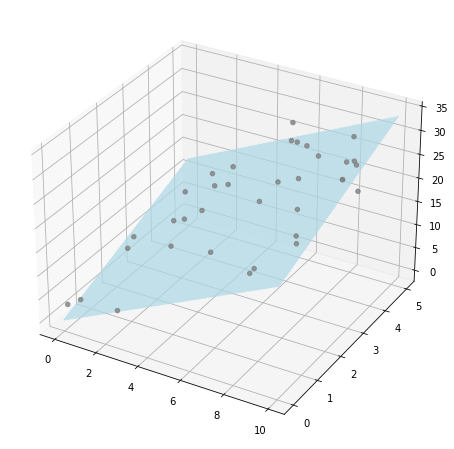

In [307]:
pred_x = pd.DataFrame(np.linspace(0,10, num=100))
pred_y = pd.DataFrame(np.linspace(0,5, num=100))
pred_x.columns = ['x1']
pred_y.columns = ['x2']
pred_x['key'] = 1
pred_y['key'] = 1
X = pred_x.join(pred_y.set_index('key'), on='key', how='inner')
X.drop(['key'], axis='columns', inplace=True)
pred_x = X['x1']
pred_y = X['x2']

def get_true_z(x1, x2):
    return (2.1*x1) + (2.5*x2) + random.gauss(0,2)

true_z = X[['x1', 'x2']].apply(lambda x: get_true_z(*x), axis='columns')
X['true_z'] = true_z
X_sample = X.copy()
X_sample = X_sample.sample(35)
x = X_sample['x1']
y = X_sample['x2']
z = X_sample['true_z']

X.drop(['true_z'], axis='columns', inplace=True)
lr.fit(X, true_z)
pred_z = lr.predict(X)
fig = plt.figure()
ax = plt.axes(projection= '3d')
ax.scatter(x, y, z, color='gray', alpha=0.8)
ax.plot(pred_x, pred_y, pred_z, color='lightblue', alpha=0.7)

plt.show()


### Normal Equation

In [308]:
np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),true_z)

<ipython-input-308-dc25957b5176>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),true_z)


0    2.097029
1    2.505470
dtype: float64

### Gradient Decent

In [324]:
y = true_z
y_new = pd.DataFrame(y)
X_new = X.copy()
X_new.insert(0, 'x0', 1)


In [325]:
y_new

,0
0,-0.451300
0,-1.292537
0,1.653902
0,2.618520
0,-3.851692
...,...
99,32.928052
99,35.876492
99,30.182111
99,32.869243


In [326]:
X_new

,x0,x1,x2
0,1,0.0,0.000000
0,1,0.0,0.050505
0,1,0.0,0.101010
0,1,0.0,0.151515
0,1,0.0,0.202020
...,...,...,...
99,1,10.0,4.797980
99,1,10.0,4.848485
99,1,10.0,4.898990
99,1,10.0,4.949495


In [338]:
initial_betas = pd.DataFrame({'beta': [1,1,1]})
betas = initial_betas.copy()
betas

,beta
0,1
1,1
2,1


In [339]:
least_squares_loss = np.power(np.matmul(X_new, betas) - y_new, 2).sum()

<ipython-input-339-1f2f7bb5db4f>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  least_squares_loss = np.power(np.matmul(X_new, betas) - y_new, 2).sum()
